# Setup

In [1]:
!pip install llama-cpp-python==0.1.78

In [2]:
from urllib.request import urlopen
from shutil import copyfileobj

model_url = "https://huggingface.co/TheBloke/Llama-2-7B-Chat-GGML/resolve/main/llama-2-7b-chat.ggmlv3.q4_0.bin"
model_filename = "llama-2-7b-chat.ggmlv3.q4_0.bin"

with urlopen(model_url) as in_stream, open(model_filename, 'wb') as out_file:
    copyfileobj(in_stream, out_file)

In [3]:
!pwd && ls -lh

/content
total 3.6G
-rw-r--r-- 1 root root 3.6G Aug 26 07:24 llama-2-7b-chat.ggmlv3.q4_0.bin
drwxr-xr-x 1 root root 4.0K Aug 24 21:25 sample_data


In [4]:
from llama_cpp import Llama

llm = Llama(model_path="/content/llama-2-7b-chat.ggmlv3.q4_0.bin")

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 0 | SSE3 = 1 | VSX = 0 | 


In [5]:
def start_generate(llm, tokens, top_k=40, top_p=0.95, temp=0.8):
  g = llm.generate(tokens, top_k=top_k, top_p=top_p, temp=temp)
  t = next(g)
  return t, g

In [6]:
def token_string(llm, t):
  return llm.detokenize([t]).decode()

def display_token(llm, t):
  print(t, f'"{token_string(llm, t)}"')

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_all_logits(llm):
  logits = np.array(llm.eval_logits)
  l2 = logits.reshape((80,-1))
  plt.figure(figsize=(12, 3))
  plt.imshow(l2)
  plt.show()

def plot_top_logits(llm, top_n=10, figsize=(6, 3), fontsize=10):
  logits = np.array(llm.eval_logits)
  ts = np.flip(np.flip(np.argsort(logits))[0,:top_n])
  labels = [llm.detokenize([t]).decode().replace('\$\$','\\$\\$') for t in ts]
  strengths = logits[0, ts]
  plt.figure(figsize=figsize)
  plt.rc('font', size=fontsize)
  plt.barh(y=labels, width=strengths)
  plt.show()

# Base case generation

In [8]:
prompt_base = b"### Human: Tell me a story\n### Assistant:"
tokens_base = llm.tokenize(prompt_base)

In [9]:
t11, g1 = start_generate(llm, tokens_base)

In [10]:
display_token(llm, t11)

4587 " Of"


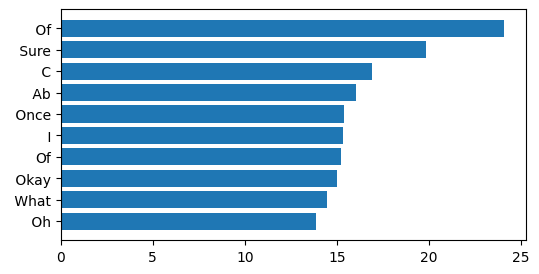

In [11]:
plot_top_logits(llm)

In [12]:
t12 = next(g1)
display_token(llm, t12)

3236 " course"


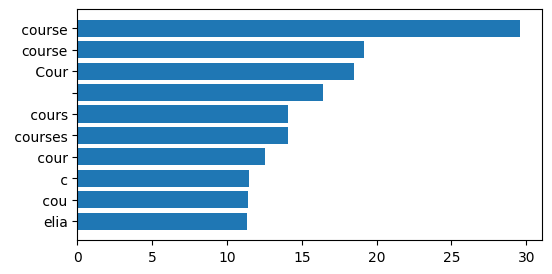

In [13]:
plot_top_logits(llm)

In [14]:
t13 = next(g1)
display_token(llm, t13)

29991 "!"


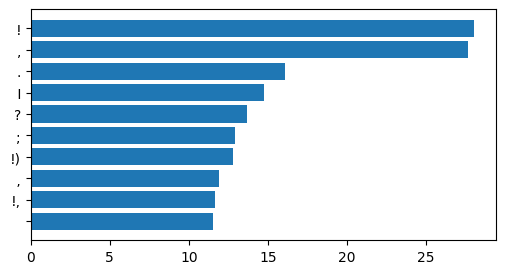

In [15]:
plot_top_logits(llm)

# Vary base case

In [16]:
# Force sequence of tokens to reflect the second choice for the first response token
prompt_vary = prompt_base + b" Sure"
tokens_vary = llm.tokenize(prompt_vary)

In [17]:
llm.reset()
t22, g2 = start_generate(llm, tokens_vary)

In [18]:
display_token(llm, t22)

29892 ","


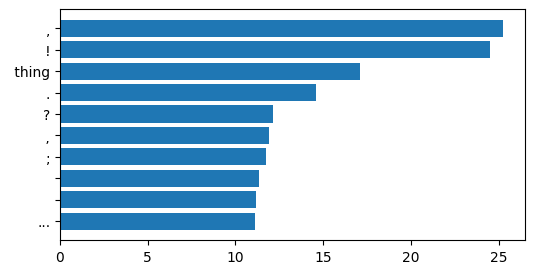

In [19]:
plot_top_logits(llm)

In [20]:
t23 = next(g2)
display_token(llm, t23)

306 " I"


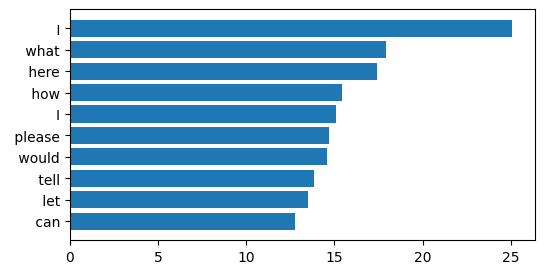

In [21]:
plot_top_logits(llm)

## And another variation

Llama.generate: prefix-match hit


2929 "sol"


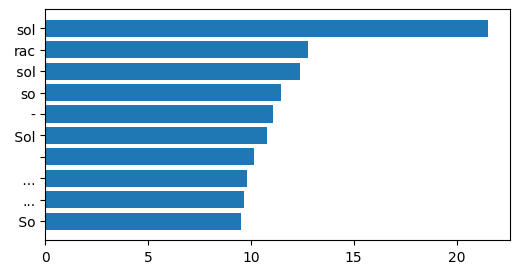

In [22]:
# looks like an alternative opening could be "Absolutely" - shall we check?
prompt_ab = prompt_base + b" Ab"
tokens_ab = llm.tokenize(prompt_ab)
t32, g3 = start_generate(llm, tokens_ab)
display_token(llm, t32)
plot_top_logits(llm)

# Generate a chunk of text

In [23]:
llm2 = Llama(model_path="/content/llama-2-7b-chat.ggmlv3.q4_0.bin", seed=42)

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 0 | SSE3 = 1 | VSX = 0 | 


With `temperature=0` we expect identical results

In [24]:
llm2.reset()
llm2.create_completion(prompt_base.decode(), max_tokens=64, temperature=0)

{'id': 'cmpl-d1e7cb19-bba3-4e80-bff4-c1325f8358d9',
 'object': 'text_completion',
 'created': 1693034692,
 'model': '/content/llama-2-7b-chat.ggmlv3.q4_0.bin',
 'choices': [{'text': " Of course! I'd be happy to tell you a story. Can you give me some details about what kind of story you would like to hear? For example, do you want it to be a funny story, a sad story, or an adventure story?",
   'index': 0,
   'logprobs': None,
   'finish_reason': 'stop'}],
 'usage': {'prompt_tokens': 14, 'completion_tokens': 55, 'total_tokens': 69}}

In [25]:
llm2.reset()
llm2.create_completion(prompt_base.decode(), max_tokens=64, temperature=0)

{'id': 'cmpl-fe0f2031-a30b-4cd9-bbe4-77ec6b798698',
 'object': 'text_completion',
 'created': 1693034754,
 'model': '/content/llama-2-7b-chat.ggmlv3.q4_0.bin',
 'choices': [{'text': " Of course! I'd be happy to tell you a story. Can you give me some details about what kind of story you would like to hear? For example, do you want it to be a funny story, a sad story, or an adventure story?",
   'index': 0,
   'logprobs': None,
   'finish_reason': 'stop'}],
 'usage': {'prompt_tokens': 14, 'completion_tokens': 55, 'total_tokens': 69}}

With `temperature=0.8` as a typical value we expect varied but consistent results

In [26]:
llm2.reset()
llm2.create_completion(prompt_base.decode(), max_tokens=64, temperature=0.8)

{'id': 'cmpl-d1f96032-97fb-42a9-9f41-ceba95ad2e88',
 'object': 'text_completion',
 'created': 1693034815,
 'model': '/content/llama-2-7b-chat.ggmlv3.q4_0.bin',
 'choices': [{'text': " Of course, I'd be happy to tell you a story! Can you give me some details about what kind of story you would like to hear? For example, do you want it to be funny, sad, scary, or something else entirely?",
   'index': 0,
   'logprobs': None,
   'finish_reason': 'stop'}],
 'usage': {'prompt_tokens': 14, 'completion_tokens': 53, 'total_tokens': 67}}

In [27]:
llm2.reset()
llm2.create_completion(prompt_base.decode(), max_tokens=64, temperature=0.8)

{'id': 'cmpl-8ee6a6ee-7166-4047-a6a6-ef1967bc0d50',
 'object': 'text_completion',
 'created': 1693034876,
 'model': '/content/llama-2-7b-chat.ggmlv3.q4_0.bin',
 'choices': [{'text': " Of course! I'd be happy to tell you a story. Can you give me some information about what kind of story you would like to hear? For example, do you want it to be funny, sad, or exciting? Do you have any specific themes or characters in mind?",
   'index': 0,
   'logprobs': None,
   'finish_reason': 'stop'}],
 'usage': {'prompt_tokens': 14, 'completion_tokens': 61, 'total_tokens': 75}}

With `temperature=5` we expect quite varied results

In [28]:
llm2.reset()
llm2.create_completion(prompt_base.decode(), max_tokens=64, temperature=5)

{'id': 'cmpl-4c5163d5-3bc5-409d-a748-bb84a8c944af',
 'object': 'text_completion',
 'created': 1693034938,
 'model': '/content/llama-2-7b-chat.ggmlv3.q4_0.bin',
 'choices': [{'text': " Of course, I'd be happy to tell you a story! Here is one I just made up on the spot:\n\nOnce upon a time, in a far-off land, there was a small village nestled at the foot of a great mountain. The villagers were known for their exceptional skill",
   'index': 0,
   'logprobs': None,
   'finish_reason': 'length'}],
 'usage': {'prompt_tokens': 14, 'completion_tokens': 64, 'total_tokens': 78}}

In [29]:
llm2.reset()
llm2.create_completion(prompt_base.decode(), max_tokens=64, temperature=5)

{'id': 'cmpl-911844ae-1113-4f80-a4d3-6e4e0a13f376',
 'object': 'text_completion',
 'created': 1693035005,
 'model': '/content/llama-2-7b-chat.ggmlv3.q4_0.bin',
 'choices': [{'text': ' Of course! What would you like the story to be about? Fantasy, adventure, romance, or something else? ',
   'index': 0,
   'logprobs': None,
   'finish_reason': 'stop'}],
 'usage': {'prompt_tokens': 14, 'completion_tokens': 27, 'total_tokens': 41}}

# Approximate generation with eval, sample and token concatenation

In [30]:
import random

def sample_trials(llm, n=10, temp=0.8):
  ts = []
  for i in range(n):
    t = llm.sample(temp=temp)
    ts.append(t)
  return ts

def generate_from_sample_trials(llm, tokens, n=10, temp=0.8):
  llm.eval(tokens)
  plot_top_logits(llm, figsize=(2,1), fontsize=5)
  ts = sample_trials(llm, n=n, temp=temp)
  u_ts = np.unique(ts, return_counts=True)
  u_display = [(t, token_string(llm, t), u_ts[1][i]) for i, t in enumerate(u_ts[0])]
  print(u_display)
  t = random.choice(ts)
  print(f"Choose: {(t, token_string(llm, t))}")
  generated_tokens = list(tokens)
  generated_tokens.append(t)
  return generated_tokens

In [31]:
llm3 = Llama(model_path="/content/llama-2-7b-chat.ggmlv3.q4_0.bin", seed=917)

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 0 | SSE3 = 1 | VSX = 0 | 


First time round with low temp

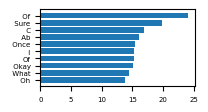

[(4587, ' Of', 10)]
Choose: (4587, ' Of')


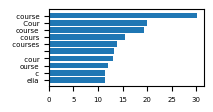

[(3236, ' course', 10)]
Choose: (3236, ' course')


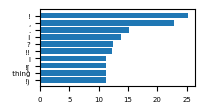

[(29991, '!', 10)]
Choose: (29991, '!')


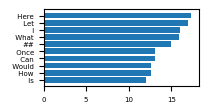

[(2266, ' Here', 10)]
Choose: (2266, ' Here')


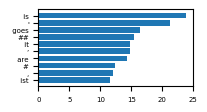

[(338, ' is', 10)]
Choose: (338, ' is')


In [32]:
gts = tokens_base
llm3.reset()

for i in range(5):
  gts = generate_from_sample_trials(llm3, gts, temp=0)

In [33]:
text = llm3.detokenize(gts)
text.decode()

'### Human: Tell me a story\n### Assistant: Of course! Here is'

Typical temp

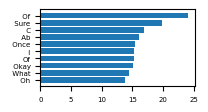

[(4587, ' Of', 10)]
Choose: (4587, ' Of')


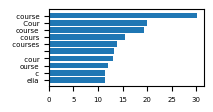

[(3236, ' course', 10)]
Choose: (3236, ' course')


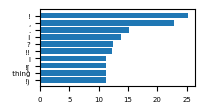

[(29892, ',', 1), (29991, '!', 9)]
Choose: (29991, '!')


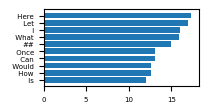

[(306, ' I', 2), (1724, ' What', 2), (2266, ' Here', 2), (2803, ' Let', 4)]
Choose: (2803, ' Let')


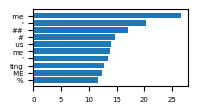

[(592, ' me', 10)]
Choose: (592, ' me')


In [34]:
gts = tokens_base
llm3.reset()

for i in range(5):
  gts = generate_from_sample_trials(llm3, gts, temp=0.8)

In [35]:
text = llm3.detokenize(gts)
text.decode()

'### Human: Tell me a story\n### Assistant: Of course! Let me'

Again with high temp

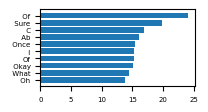

[(4587, ' Of', 10)]
Choose: (4587, ' Of')


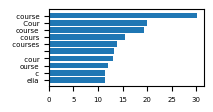

[(3236, ' course', 10)]
Choose: (3236, ' course')


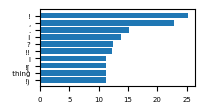

[(29892, ',', 7), (29991, '!', 3)]
Choose: (29991, '!')


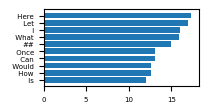

[(306, ' I', 2), (1724, ' What', 4), (2266, ' Here', 1), (2803, ' Let', 3)]
Choose: (2803, ' Let')


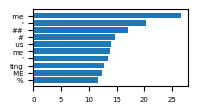

[(592, ' me', 10)]
Choose: (592, ' me')


In [36]:
gts = tokens_base
llm3.reset()

for i in range(5):
  gts = generate_from_sample_trials(llm3, gts, temp=5)

In [37]:
text = llm3.detokenize(gts)
text.decode()

'### Human: Tell me a story\n### Assistant: Of course! Let me'